In [1]:
import numpy as np
import pandas as pd
import seaborn as sb

In [2]:
dataset = pd.read_csv('kc_house_data.csv')
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


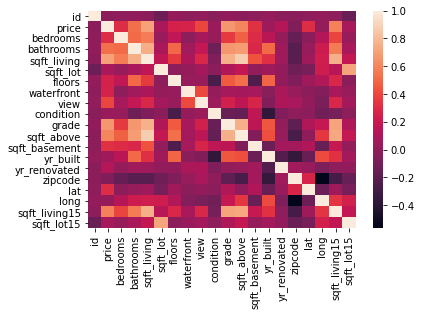

In [3]:
sb.heatmap(dataset.corr())

In [4]:
x = np.array(dataset.iloc[:, 3:])
y = np.array(dataset[['price']])
x = np.column_stack((np.ones((x.shape[0],1)), x))

In [5]:
B = x.T@x
B = np.linalg.pinv(B)@x.T@y
B

array([[ 7.25457882e+01],
       [-3.55112011e+04],
       [ 4.10548951e+04],
       [ 1.10263544e+02],
       [ 1.33383087e-01],
       [ 5.26156034e+03],
       [ 5.83295395e+05],
       [ 5.23552276e+04],
       [ 2.72094262e+04],
       [ 9.54805280e+04],
       [ 7.13933921e+01],
       [ 3.88720448e+01],
       [-2.56179589e+03],
       [ 2.04186944e+01],
       [-5.19076331e+02],
       [ 6.02189076e+05],
       [-2.17900343e+05],
       [ 2.30994307e+01],
       [-3.76111346e-01]])

In [6]:
y_pred = x@B
y_pred

array([[214165.24961057],
       [736050.03190796],
       [376774.44325502],
       ...,
       [147579.54872616],
       [381526.70075266],
       [150168.61330049]])

In [7]:
y_mean = np.mean(y)
R2 = (y_pred - y_mean).T@(y_pred - y_mean)/((y - y_mean).T@(y - y_mean))
R2[0][0]


0.6996864627542719

In [8]:
mse = (y_pred-y).T@(y_pred-y)/(y.shape[0])
print(mse[0][0])

40476675707.89203
